# Requirements and Setup
It will take a while to install all the dependencies and expect around 20min to run this demo on this Google Colab

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
%env FORCE_CUDA=1
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install pyyaml==5.1 pycocotools>=2.0.1
!pip install -U fvcore
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
!pip install 'git+https://github.com/facebookresearch/pytorch3d.git'

env: FORCE_CUDA=1
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
Requirement already up-to-date: fvcore in /usr/local/lib/python3.6/dist-packages (0.1.2.post20201020)
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
  Cloning https://github.com/facebookresearch/pytorch3d.git to /tmp/pip-req-build-oi6td076
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-oi6td076
  Created wheel for pytorch3d: filename=pytorch3d-0.2.5-cp36-cp36m-linux_x86_64.whl size=13191495 sha256=7bcc285abf86387e7b466010a8732c489667497b3162295790fe3399b2222df7
  Stored in directory: /tmp/pip-ephem-wheel-cache-gsti4gbo/wheels/43/ba/81/3e4acb84fba48ba1b8264b1e4bba60662d098cb0c7cf486723
Successfully

## Imports and checking installation parameters(python 3.6.9, cuda 10.1)

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available(),torch.cuda.device_count())
!gcc --version
!python --version
!nvcc --version
!nvidia-smi
!python -m detectron2.utils.collect_env

1.5.0+cu101 True 1
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Python 3.6.9
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Mon Oct 26 05:42:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+==============

## Installing meshrcnn
It will create a folder structure on your left in which you can navigate


In [ ]:
!git clone https://github.com/facebookresearch/meshrcnn.git
!cd meshrcnn && pip install -e .

Cloning into 'meshrcnn'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 235 (delta 2), reused 9 (delta 2), pack-reused 213
Receiving objects: 100% (235/235), 132.63 KiB | 8.84 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Obtaining file:///content/meshrcnn
  Running setup.py develop for meshrcnn


# Loading Pix3D Dataset
Also this import will take a while since it is loading the entire dataset 3.5GB


In [ ]:
# pix3d data
!./meshrcnn/datasets/pix3d/download_pix3d.sh

--2020-10-26 05:42:29--  http://pix3d.csail.mit.edu/data/pix3d.zip
Resolving pix3d.csail.mit.edu (pix3d.csail.mit.edu)... 128.52.128.175
Connecting to pix3d.csail.mit.edu (pix3d.csail.mit.edu)|128.52.128.175|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3783261880 (3.5G) [application/zip]
Saving to: ‘pix3d.zip’

pix3d.zip           100%[===================>]   3.52G  39.9MB/s    in 91s     

2020-10-26 05:44:01 (39.5 MB/s) - ‘pix3d.zip’ saved [3783261880/3783261880]

--2020-10-26 05:45:35--  https://dl.fbaipublicfiles.com/meshrcnn/pix3d/pix3d_s1_train.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4781155 (4.6M) [text/plain]
Saving to: ‘pix3d_s1_train.json’

pix3d_s1_train.json 100%[===================>]   4.56M  25.4MB/s    in 0.2s    

2020-10-26 05

In [ ]:
from google.colab import files
uploaded = files.upload()  # import a sofa from your computer and name it test.jpg

Saving test.jpg to test.jpg


## Demo (Inference)

In [ ]:
# Running Demo on random image of the pix3d dataset, change according to your need (change 'test.jpg' to your file name)
# Be sure to upload the file on the correct folder

!python ./meshrcnn/demo/demo.py --config-file ./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml \
--input /content/test.jpg --output output_demo --onlyhighest MODEL.WEIGHTS meshrcnn://meshrcnn_R50.pth

[10/26 05:49:44 demo]: Arguments: Namespace(config_file='./meshrcnn/configs/pix3d/meshrcnn_R50_FPN.yaml', focal_length=20.0, input='/content/test.jpg', onlyhighest=True, opts=['MODEL.WEIGHTS', 'meshrcnn://meshrcnn_R50.pth'], output='output_demo')
meshrcnn_R50.pth: 487MB [00:07, 65.5MB/s]               
[10/26 05:50:05 demo]: Predictions saved in output_demo/test


# Visualize the Picture Uploaded and the Segmentation Mask 

In [ ]:
filename = 'test.jpg' #check the name is the same as the file you uploaded
maskname = '0_mask_sofa_1.000.png' # Make sure to change the file name with the appropriate mask change 'test/0_mask_sofa_1.000.png'

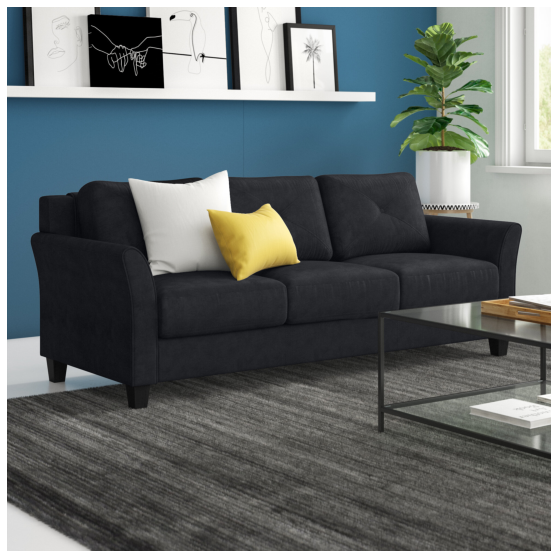

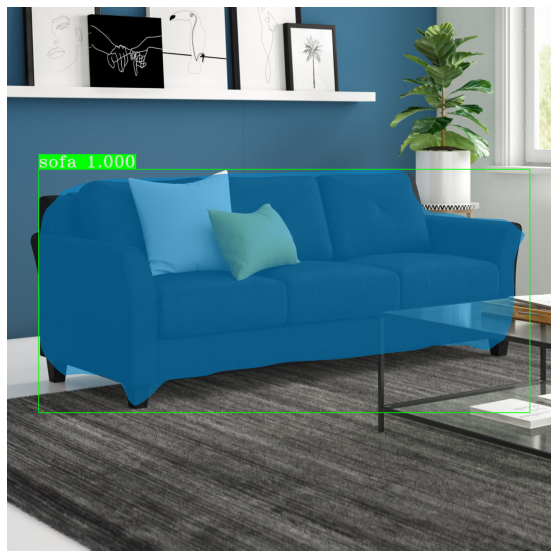

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

img = plt.imread("/content/" + filename) 
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
img = plt.imread("/content/output_demo/test/" + maskname)  
plt.imshow(img)
plt.axis('off')
plt.show()

# Download the .obj file

In [ ]:
name = 'sofa' # change file name accordingly

In [ ]:
from google.colab import files
files.download('/content/output_demo/test/0_mesh_'+ name + '_1.000.obj')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>